In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Music Genre Classification'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Music Genre Classification/features_30_sec.csv
/content/drive/MyDrive/Music Genre Classification/features_3_sec.csv
/content/drive/MyDrive/Music Genre Classification/images_original/blues/blues00001.png
/content/drive/MyDrive/Music Genre Classification/images_original/blues/blues00007.png
/content/drive/MyDrive/Music Genre Classification/images_original/blues/blues00028.png
/content/drive/MyDrive/Music Genre Classification/images_original/blues/blues00032.png
/content/drive/MyDrive/Music Genre Classification/images_original/blues/blues00033.png
/content/drive/MyDrive/Music Genre Classification/images_original/blues/blues00016.png
/content/drive/MyDrive/Music Genre Classification/images_original/blues/blues00003.png
/content/drive/MyDrive/Music Genre Classification/images_original/blues/blues00025.png
/content/drive/MyDrive/Music Genre Classification/images_original/blues/blues00006.png
/content/drive/MyDrive/Music Genre Classification/images_original/blues/blues0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import pickle
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Music Genre Classification/features_3_sec.csv")
df.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.051501            65671.875673  ...   64.748276   
2              2084.565132            75124.921716  ...   67.336563   
3              1960.039988            82913.639269  ...   47.739452   
4              1948.503884            60204.020268  ...   30.336359   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1    -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   
2    -1.768610   28.348579     2.378768   45.717648    -1.938424   53.050835   
3    -3.841155   28.337118     1.218588   34.770935    -3.580352   50.836224   
4     0.664582   45.880913     1.689446   51.363583    -3.392489   26.738789   

   mfcc20_mean  mfcc20_var  label  
0    -0.243027   43.771767  blues  
1     5.784063   59.943081  blues  
2     2.517375   33.105122  blues  
3     3.630866   32.023678  blues  
4     0.536961   29.146694  blues  

[5 rows x 60 columns]

In [ ]:
df.shape


(9990, 60)

In [ ]:
df.columns

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

In [ ]:
df.dtypes


filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [ ]:
df=df.drop(labels="filename",axis=1)

Understanding the audio files

In [ ]:
audio_recording="/content/drive/MyDrive/Music Genre Classification/genres_original/disco/disco.00001.wav"
data,sr=librosa.load(audio_recording)
print(type(data),type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [ ]:
librosa.load(audio_recording,sr=45600)

(array([-0.17948571, -0.2512973 , -0.2389933 , ...,  0.0912752 ,
         0.04294489,  0.        ], dtype=float32),
 45600)

In [ ]:
import IPython
IPython.display.Audio(data,rate=sr)

Visualising audio files

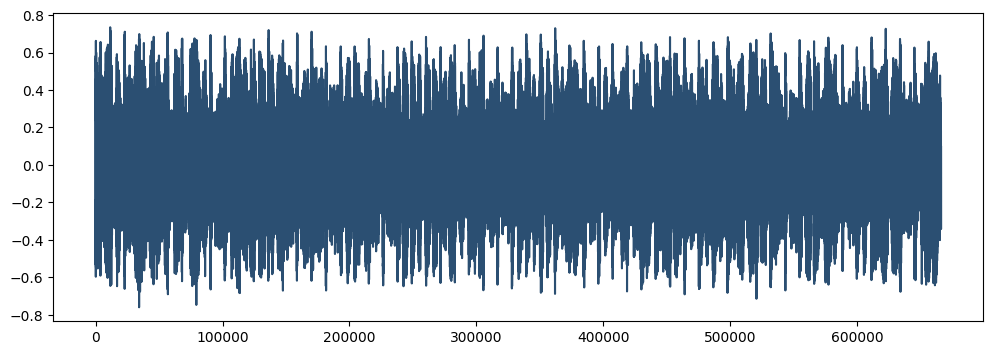

In [ ]:


# Assuming 'data' contains your audio data
plt.figure(figsize=(12,4))
plt.plot(data, color="#2B4F72")
plt.show()


<ipython-input-14-0a303c519b29>:4: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(stft,sr=sr,x_axis='time',y_axis='hz')


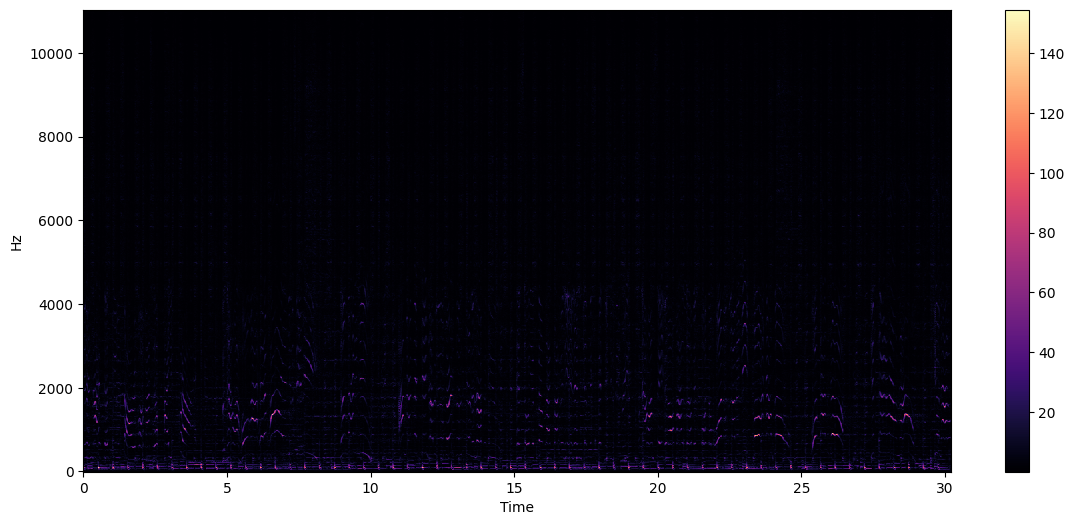

In [ ]:
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

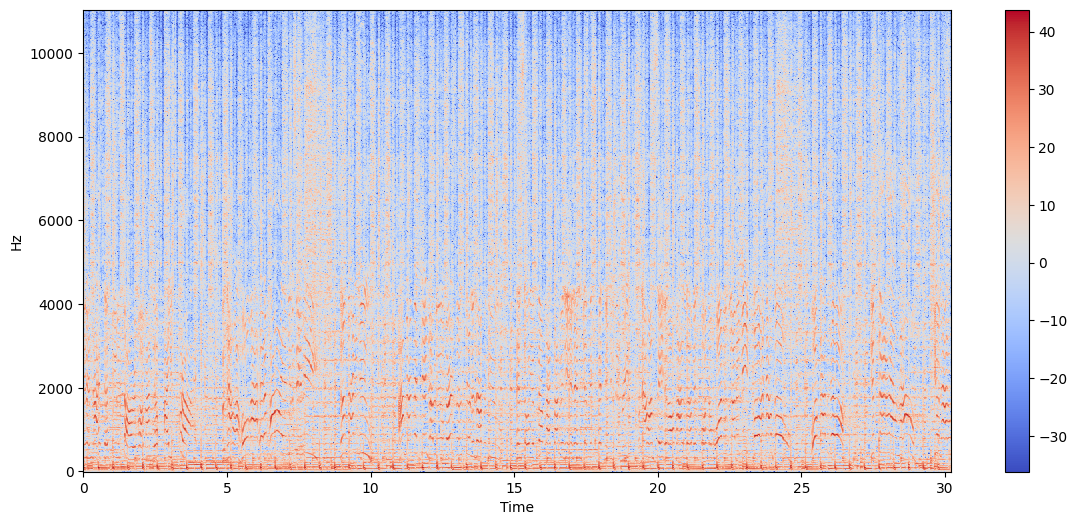

In [ ]:
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft_db,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

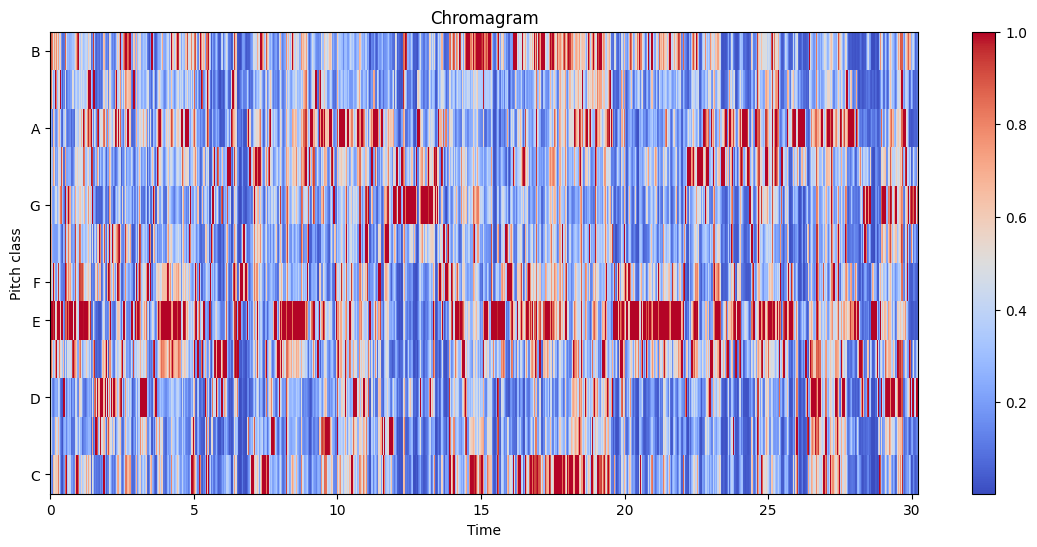

In [ ]:
import matplotlib.pyplot as plt
import librosa.display as lplt
import librosa

# Assuming 'data' contains your audio data and 'sr' is the sampling rate
chroma = librosa.feature.chroma_stft(y=data, sr=sr)
plt.figure(figsize=(14, 6))
lplt.specshow(chroma, sr=sr, x_axis="time", y_axis="chroma", cmap="coolwarm")
plt.colorbar()
plt.title('Chromagram')
plt.show()


Feature Extraction

In [ ]:
class_list=df.iloc[:,-1]
converter=LabelEncoder()

In [ ]:
y=converter.fit_transform(class_list)
y

array([0, 0, 0, ..., 9, 9, 9])

In [ ]:
print(df.iloc[:,:-1])

      length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032          167541.630869              19

Scaling the features

In [ ]:
from sklearn.preprocessing import StandardScaler
fit=StandardScaler()
X=fit.fit_transform(np.array(df.iloc[:,:-1],dtype=float))

Dividing Training and Testing Dataset

In [ ]:
X.shape

(9990, 58)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)

In [ ]:
len(y_test)

3297

In [ ]:
len(y_train)

6693

Building the model

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
def trainModel(model,epochs,optimizer):
    batch_size=128
    model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics='accuracy')
    return model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=batch_size)

In [ ]:
def plotValidate(history):
    print("Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

In [ ]:
import tensorflow as tf

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(512,activation='relu',input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(10,activation='softmax'),
])

print(model.summary())
model_history=trainModel(model=model,epochs=600,optimizer='adam')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               30208     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Save the model to a file
model.save("96ANN.h5")

print("Model saved successfully.")


Model saved successfully.


In [ ]:
test_loss,test_acc=model.evaluate(X_test,y_test,batch_size=128)
print("The test loss is ",test_loss)
print("The best accuracy is: ",test_acc*100)

26/26 [==============================] - 0s 6ms/step - loss: 0.5407 - accuracy: 0.9230
The test loss is  0.5406864881515503
The best accuracy is:  92.29602813720703


# **ANN** **2**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Define important features (replace with your selection if needed)
IMPORTANT_FEATURES = [
    'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'spectral_centroid_mean',
    'spectral_bandwidth_mean', 'rolloff_mean', 'zero_crossing_rate_mean',
    'mfcc1_mean', 'mfcc2_mean', 'mfcc3_mean', 'mfcc4_mean', 'mfcc5_mean'
]